In [2]:
from keras.layers import Input, Dense
from keras.models import Model

Using Theano backend.


In [3]:
# This is the size of our encoded representation
encoding_dim = 32 # 32 floats => compression of factor 24.5, assuming input is 784 floats

# This is our input placeholder 
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input image to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

In [4]:
# Encoder Model
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [5]:
# Decoder Model
# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [6]:
# Configure model to use per-pixel binary crossentropy loss
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
# Normalize and flatten
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [ ]:
# autoencoder.fit(x_train, x_train, nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
textfile = np.loadtxt("spark_sigmoid.txt/part-00000", dtype=str, delimiter=',')
new_array = []
for datapoint in textfile:
    new_list = []
    for i in xrange(len(datapoint)):
        string = datapoint[i]
        while(string[0] == '['):
            string = string[1:]
        while(string[-1] == ']'):
            string = string[:-1]
        new_list.append(float(string.replace('E', 'e')))
    new_array.append(new_list)
sparkSigmoidActSigmoidTop = np.asarray(new_array)

In [14]:
textfile = np.loadtxt("spark_relu_relu_top.txt/part-00000", dtype=str, delimiter=',')
new_array = []
for datapoint in textfile:
    new_list = []
    for i in xrange(len(datapoint)):
        string = datapoint[i]
        while(string[0] == '['):
            string = string[1:]
        while(string[-1] == ']'):
            string = string[:-1]
        new_list.append(float(string.replace('E', 'e')))
    new_array.append(new_list)
sparkReluActReluTop = np.asarray(new_array)

In [15]:
textfile = np.loadtxt("spark_relu_sigmoid_top.txt/part-00000", dtype=str, delimiter=',')
new_array = []
for datapoint in textfile:
    new_list = []
    for i in xrange(len(datapoint)):
        string = datapoint[i]
        while(string[0] == '['):
            string = string[1:]
        while(string[-1] == ']'):
            string = string[:-1]
        new_list.append(float(string.replace('E', 'e')))
    new_array.append(new_list)
sparkReluActSigmoidTop = np.asarray(new_array)

In [9]:
textfile = np.loadtxt("spark_sigmoid_top_gradient.txt/part-00000", dtype=str, delimiter=',')
new_array = []
for datapoint in textfile:
    new_list = []
    for i in xrange(len(datapoint)):
        string = datapoint[i]
        while(string[0] == '['):
            string = string[1:]
        while(string[-1] == ']'):
            string = string[:-1]
        new_list.append(float(string.replace('E', 'e')))
    new_array.append(new_list)
sparkSigmoidTopGradient = np.asarray(new_array)

Spark Sigmoid with Sigmoid on Top, Altered Gradient


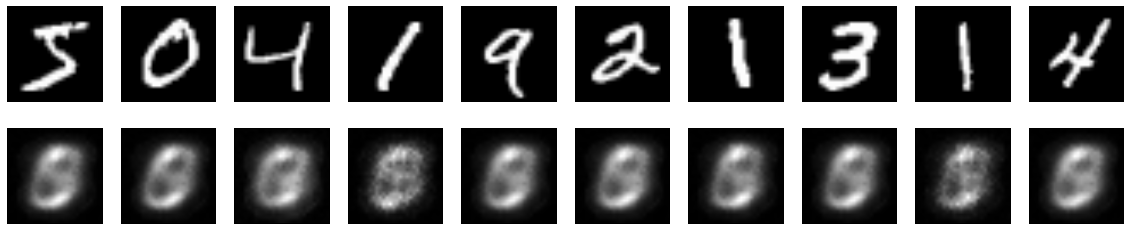

Spark Relu with Sigmoid on Top


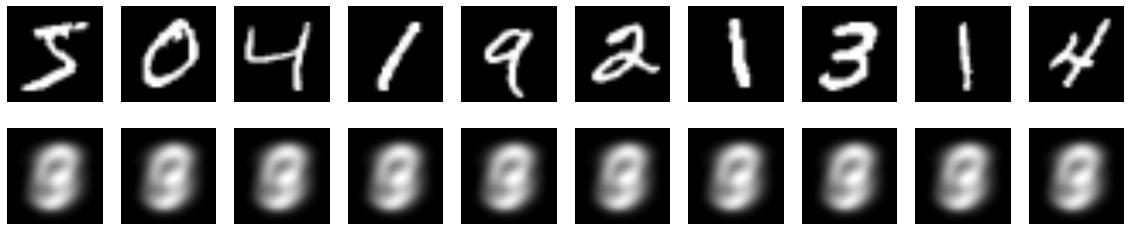

Spark Relu with Relu on Top


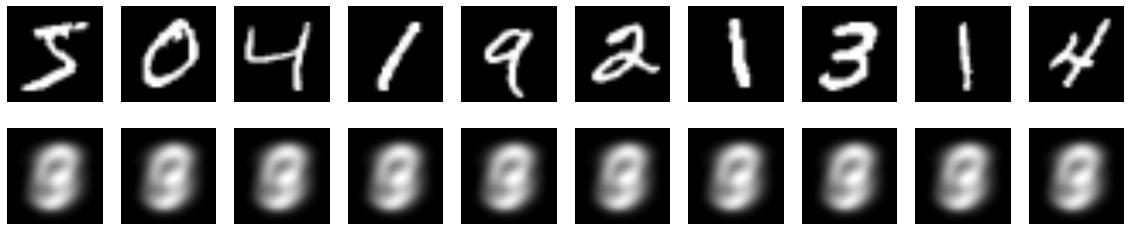

Spark Sigmoid With Sigmoid on Top


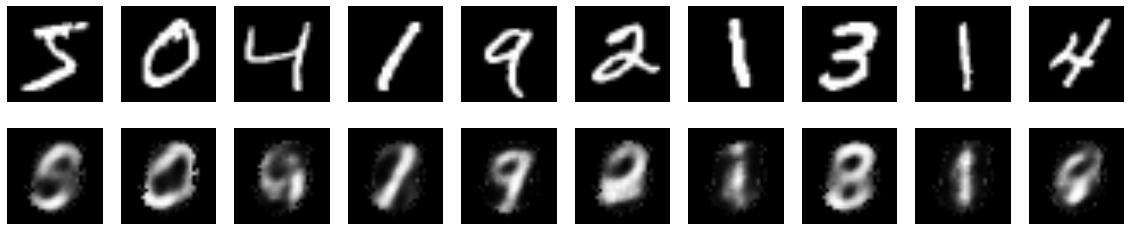

In [24]:

%matplotlib inline
import matplotlib.pyplot as plt
print("Spark Sigmoid with Sigmoid on Top, Altered Gradient")
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkSigmoidTopGradient[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Spark Relu with Sigmoid on Top")
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkReluActSigmoidTop[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Spark Relu with Relu on Top")
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkReluActReluTop[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Spark Sigmoid With Sigmoid on Top")
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkSigmoidActSigmoidTop[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

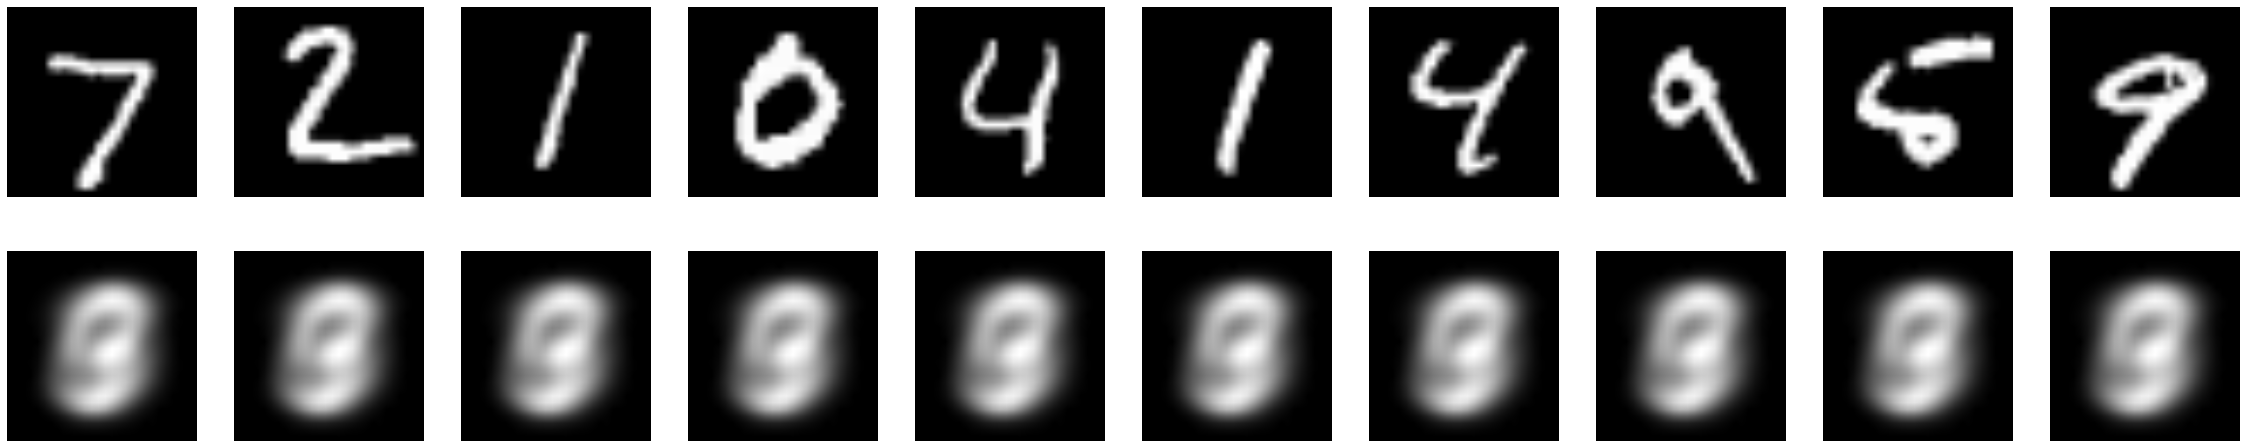

In [23]:
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(40, 8))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction Spark Sigmoid
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkSigmoidActSigmoidTop[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkReluActReluTop[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(sparkReluActSigmoidTop[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()